This dataset contains daily bicycle counts recorded at Seattle's Fremont Bridge, along with weather, seasonal, and other contextual data. The dataset includes the number of cyclists crossing the bridge each day and various associated factors. We apply simple linear regression to analyze how weather conditions and other variables influence bicycle traffic, estimating the impact of each parameter on daily rider counts.

In [ ]:
# download dataset
!gdown 12OEFoq_65x6Sy4doc24FwHu1ujKpbXSn

Downloading...
From: https://drive.google.com/uc?id=12OEFoq_65x6Sy4doc24FwHu1ujKpbXSn
To: c:\Users\Vincent\Proton Drive\vincent.kehl\My files\Projekte\Linear_Regression\bikers_data.csv

  0%|          | 0.00/213k [00:00<?, ?B/s]
100%|██████████| 213k/213k [00:00<00:00, 4.10MB/s]


In [10]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Load Data
data = pd.read_csv("bikers_data.csv", index_col="Date")
data

,Number of bikers,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,Rainfall (in),Temp (F),dry day
Date,,,,,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.00,56.0,1
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.00,56.5,1
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.00,59.5,1
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.00,60.5,1
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.00,60.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,4552.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.237706,0.01,41.0,0
2019-12-28,3352.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.245532,0.00,44.0,1
2019-12-29,3692.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.254701,0.01,45.5,0


In [12]:
# use the following columns for training.
data_x = data[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun',
                'holiday', 'daylight_hrs', 'Rainfall (in)',
                'dry day', 'Temp (F)']].to_numpy()

# Separating out the target values.
data_y = data[["Number of bikers"]].to_numpy()

data_x.shape, data_y.shape

((2646, 12), (2646, 1))

### Split the dataset into training and testing sets
Keep 80% of the data for training and 20% of the data for testing.

In [13]:
# Define the split to 20%
test_size = 0.2

# Determine the number of samples for testing
num_test = int(data_x.shape[0] * test_size) # number of rows * 0.2

# Create an array of indices for shuffling
index = np.arange(data_x.shape[0]) # index-array
np.random.shuffle(index) # shuffle index
print(index)

# Split indices into training and testing indeces
train_index = index[num_test:] # 80% indices
test_index = index[:num_test]  # 20% indices

# Split features and target using indices
x_train = data_x[train_index]
x_test = data_x[test_index]
y_train = data_y[train_index]
y_test = data_y[test_index]

[ 819 1564 1747 ... 1734  718 1156]


### Train a Linear Regression Model  
Construct a linear regression model to predict the number of cyclists using the mean squared error (MSE) loss function.  

The linear regression equation is given by:  
$$
y = b + w_1 x_1 + w_2 x_2 + \dots + w_n x_n
$$
where y represents the predicted number of cyclists, $x_i$ are the input features (e.g., weather conditions, season), $w_i$ are the corresponding weights, and $b$ is the bias term.


In [14]:
# Prepare data for training by adding a column with 1 for calculating intercept
x_ones = np.ones((x_train.shape[0], 1)) # create array of ones with same number of rows as x_train and one column
x_train = np.concatenate([x_ones, x_train], axis=1)
x_ones = np.ones((x_test.shape[0], 1)) # create array of ones with same number of rows as x_test and one column
x_test = np.concatenate([x_ones, x_test], axis=1)

# Calculate vector of coefficents using the mean squares method (normal equation)
theta = np.linalg.solve(x_train.T @ x_train , x_train.T @ y_train)
print(f"vector of coefficients:\n{theta}")

vector of coefficients:
[[ 16470.28803465]
 [-18647.21273786]
 [-18333.39920359]
 [-18419.11000521]
 [-18905.92044177]
 [-20261.78187837]
 [-25796.43322759]
 [-26120.65539662]
 [ -4709.04961466]
 [   417.87714802]
 [ -2846.90354734]
 [  2150.58485436]
 [   178.64721772]]


### Prediction and Evaluation

Predict on the test set and calculate the average absolute error between predictions and true value.

MAE: 1744.815092861545 [mean absolute error]
 R²: 0.8305271946555386 [coefficient of determination]


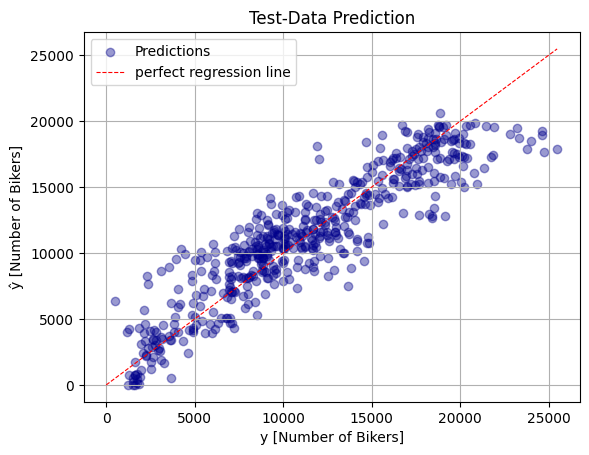

In [15]:
# Predict the target values for the test data using the calculated regression coefficients
y_test_predictions = x_test @ theta
y_test_predictions = np.maximum(y_test_predictions, 0) # replace negative predictions with zeros

# Calculate average absolute error = (1/n) * sum(Predicted Value - Actual Value)
mae = np.mean(np.abs(y_test_predictions - y_test))
print(f"MAE: {mae} [mean absolute error]")

# Calculate R² = 1 - ( SSR / SST )
# SSR: sum of the squared differences between the actual target values and the predicted values
# SST: sum of the squared differences between the actual target values and the mean of the target values
ssr = np.sum((y_test_predictions - y_test)**2)
sst = np.sum((y_test - np.mean(y_test))**2)
coeff_det = 1 - (ssr/sst)
print(f" R²: {coeff_det} [coefficient of determination]")

# Plot the predicted and the actual data with a theoretical perfect regression line
plt.scatter(y_test, y_test_predictions, color="darkblue", alpha=0.4, label="Predictions")
plt.plot([0, np.max(y_test)], [0, np.max(y_test)], color="red", linestyle="--", linewidth=0.8, label="perfect regression line")
plt.xlabel("y [Number of Bikers]")
plt.ylabel("ŷ [Number of Bikers]")
plt.title("Test-Data Prediction")
plt.legend()
plt.grid(True)
plt.show()

##### **MAE (Mean Absolute Error)**  
- Represents the average absolute difference between predictions and actual values.  
- Indicates the typical size of prediction errors.  
**Conclusion:**  
$MAE \approx 2000$ → Given the data range (0 to over 25,000), the error appears relatively moderate.  
##### **R² (Coefficient of Determination)**  
- Measures how well the model's predictions match the actual data.  
- Ranges from **0 to 1**, where **1** indicates a perfect fit and **0** suggests no correlation.  
**Conclusion:**  
$R^2 \approx 0.78$ → Model is performing reasonably well.  

### Example: Predicting Bicycle Traffic  

**Question:** What is the expected number of cyclists on a **dry, non-holiday Monday** with **0 inches of rain**, **10.5 hours of daylight**, and a temperature of **60°F**?


In [16]:
# [Mon, Tue, Wed, Thu, Fri, Sat, Sun, holiday, daylight_hrs, Rainfall (in), dry day, Temp (F)]
input_data = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 10.5, 0, 1, 60]]) # set the given input_data
x_ones = np.ones((input_data.shape[0], 1)) # create array of ones with same number of rows as input_data and one column
x_input_data = np.concatenate([x_ones, input_data], axis=1)

# Prediction
predicted_bikers = x_input_data @ theta
print(f"Predicted Number of Bikers: {int(predicted_bikers[0])}")

Predicted Number of Bikers: 15080


C:\Users\Vincent\AppData\Local\Temp\ipykernel_20068\1599251776.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Predicted Number of Bikers: {int(predicted_bikers[0])}")
